<a href="https://colab.research.google.com/github/Rhythmbellic/TF_bellic_robotics/blob/main/Build_Your_first_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")


2.18.0
Notebook last run (end-to-end): 2025-07-21 18:39:29.937160


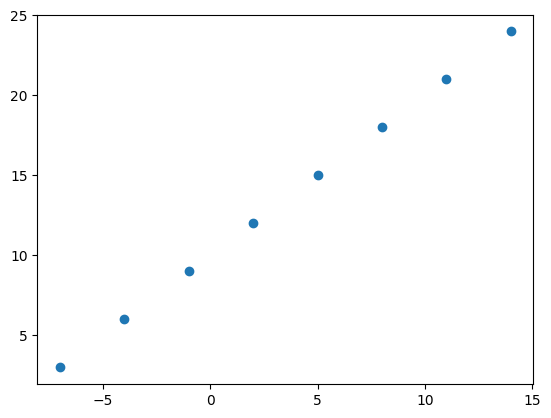

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)


((), ())

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 12.8224 - mae: 12.8224
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.6899 - mae: 12.6899
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.5574 - mae: 12.5574
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.4249 - mae: 12.4249
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 12.2924 - mae: 12.2924


In [ ]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
y_pred=model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [ ]:
y,y_pred

(array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([[-2.5302713 ],
        [-1.4244407 ],
        [-0.3186102 ],
        [ 0.78722036],
        [ 1.8930508 ],
        [ 2.9988813 ],
        [ 4.104712  ],
        [ 5.2105427 ]], dtype=float32))

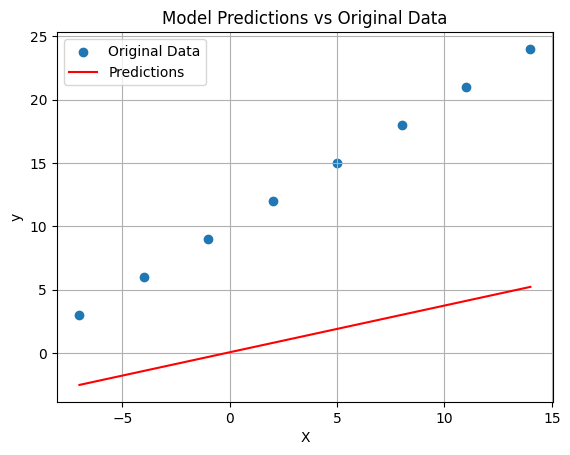

In [ ]:

# Plot original data
plt.scatter(X, y, label="Original Data")

# Plot predictions
plt.plot(X, y_pred, color='red', label="Predictions")

# Labeling
plt.xlabel("X")
plt.ylabel("y")
plt.title("Model Predictions vs Original Data")
plt.legend()
plt.grid(True)
plt.show()
